In [1]:
# length Data
bream_length =	[25.4,	26.3,	26.5,	29.0,	29.0,	29.7,	29.7,	30.0,	30.0,	30.7,	31.0,	
31.0,	31.5,	32.0,	32.0,	32.0,	33.0,	33.0,	33.5,	33.5,	34.0,	34.0,	
34.5,	35.0,	35.0,	35.0,	35.0,	36.0,	36.0,	37.0,	38.5,	38.5,	39.5,	
41.0,	41.0]

In [2]:
# weight Data
bream_weight = [242.0,	290.0,	340.0,	363.0,	430.0,	450.0,	500.0,	390.0,	450.0,	500.0,	
475.0,	500.0,	500.0,	340.0,	600.0,	600.0,	700.0,	700.0,	610.0,	650.0,
575.0,	685.0,	620.0,	680.0,	700.0,	725.0,	720.0,	714.0,	850.0,	1000.0,
920.0,	955.0,	925.0,	975.0,	950.0]

In [3]:
# 시각화 라이브러리 import
import matplotlib.pyplot as plt

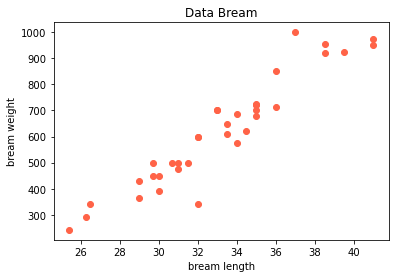

In [4]:
plt.scatter(bream_length, bream_weight, c = 'tomato') # 산점도 그리기
plt.xlabel('bream length') # x축 라벨 : 길이
plt.ylabel('bream weight') # y축 라벨 : 무게
plt.title('Data Bream')
plt.show() 

In [5]:
# 빙어 length 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
12.4, 13.0, 14.3, 15.0]
# 빙어 weight 데이터
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
12.2, 19.7, 19.9]

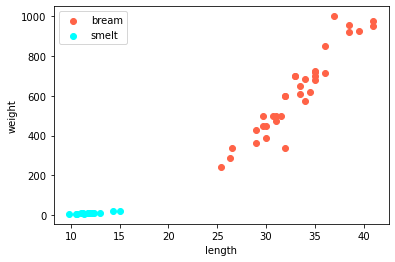

In [6]:
# 도미 데이터와 빙어 데이터 비교 산점도
plt.scatter(bream_length, bream_weight, label='bream', c = 'tomato') # 도미 그래프
plt.scatter(smelt_length, smelt_weight, label='smelt', c= 'cyan') # 빙어 그래프
plt.xlabel('length') # x축 라벨 : 길이
plt.ylabel('weight') # y축 라벨 : 무게
plt.legend() # 
plt.show()

도미와 빙어의 확연한 차이가 보임

# 첫번째 머신러닝 프로그램

In [7]:
# 길이 데이터와 무게 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
# 1차원 리스트 2개를 2차원 리스트로 변경
# zip(length, weight) 함수로 이용
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
# 정답 데이터(fish_target) 준비
# 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)를 구분
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## k-최근접 알고리즘
가장 간단한 분류 알고리즘  
**비슷한 특성을 가진 데이터는 비슷한 범주에 속한다**  
주변의 가장 가까운 k개의 데이터를 보고 데이터가 속할 그룹을 판단  

#### 단점  
모든 데이터를 가지고 있어야 됨  
많은 메모리를 소모하고 거리 계산에 많은 시간이 소요  

모델 생성 -> 모델 훈련(fit) -> 모델 평가(score) -> 새로운 데이터 결과 예측(predict)

In [10]:
# kNN 모델 생성
# 기본 이웃의 갯수 : 5
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [11]:
# 모델 훈련 fit(Training data, Target values)함수
kn.fit(fish_data, fish_target) # 기본 데이터, 정답 데이터

KNeighborsClassifier()

In [13]:
# 모델 평가 score(Testsamples, Target values) 함수
# 정확도의 평균값 리턴
kn.score(fish_data, fish_target)

1.0